In [1]:
import numpy as np
from scipy.integrate import trapz
#from scipy.integrate import cumulative_trapezoid as cumtrapz
from astropy.cosmology import Planck18 as cosmo

from gw_lensing.utils.constants import *
from gw_lensing.optical_depth import point_mass_optical_depth as tau_pm

In [2]:
#PLOTS
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import sys
dir_base=sys.path[0]
dir_out=dir_base#+"/plots_high_magnification/"

fontSZ = 20
fontSz = 18
fontsz = 16
mpl.rcParams.update({'font.size': fontsz})

\begin{equation}
\frac{d\tau}{dz_\ell} = f_{\rm DM} \frac{3}{2} y_0^2 \Omega_{\rm DM} \frac{H_0^2}{c} \frac{(1+z_\ell)^2}{H(z_\ell)} \frac{D_{ls} D_l}{D_s}
\end{equation}

In [ ]:
y0=1.
zSs = np.linspace(0.01, 3.0, 1000)
f_DM = 0.1  # Example value for the fraction of dark matter in MACHOs
taus = tau_pm.tau(zSs,f_DM,y0)

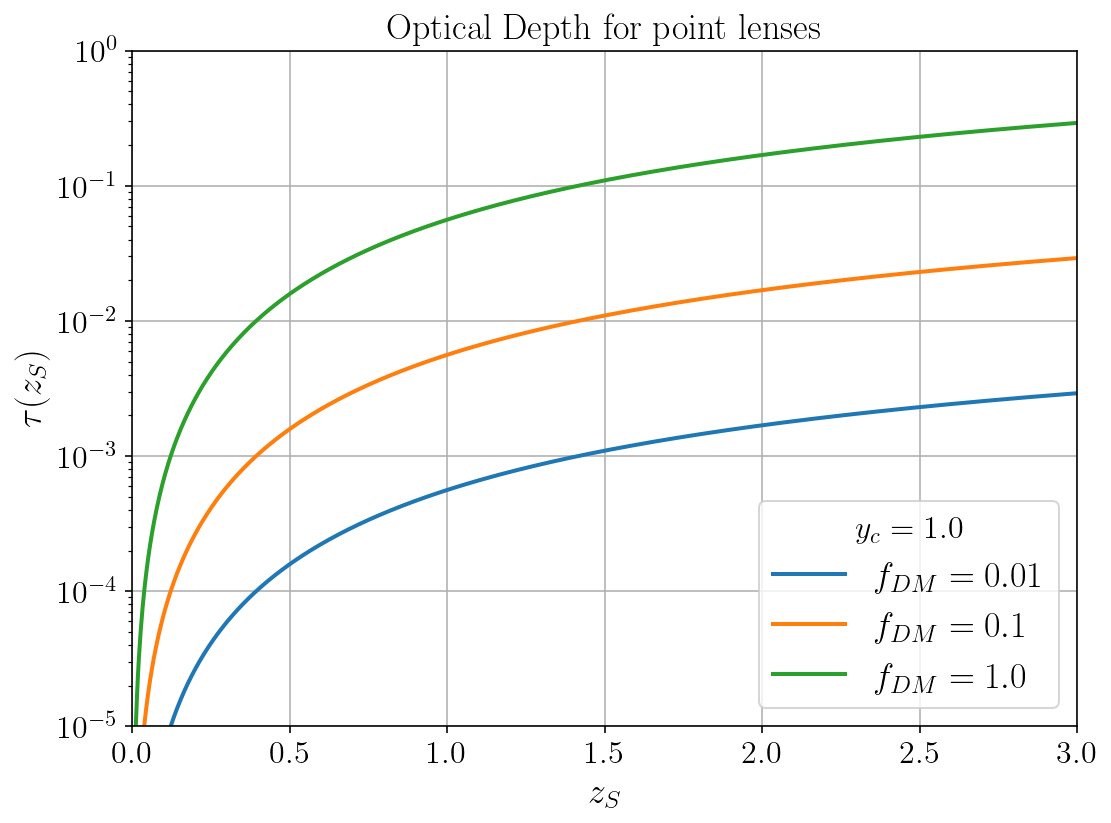

In [4]:

plt.figure(figsize=(8, 6))
plt.semilogy(zSs, taus/10, label=f'$f_{{DM}} = {f_DM/10}$', lw=2)
plt.semilogy(zSs, taus, label=f'$f_{{DM}} = {f_DM}$', lw=2)
plt.plot(zSs, 10*taus, label=f'$f_{{DM}} = {10*f_DM}$', lw=2)
plt.xlabel(r'$z_S$', fontsize=fontSz)
plt.ylabel(r'$\tau(z_S)$', fontsize=fontSz)
plt.title('Optical Depth for point lenses', fontsize=fontSz)
plt.grid()
plt.legend(fontsize=fontSz,title=r'$y_c = %.1f$' % y0)
plt.xlim(0, np.max(zSs))
plt.ylim(1e-5, 1e0)
plt.tight_layout()
plt.savefig('optical_depth_point_masses.pdf', bbox_inches='tight')
plt.show()